## Pandas数据分析

**本课案例：使用 pandas 进行 NBA 数据清洗与分析**

已知一个nba球员的数据集`all_seasons.csv`，示例如下所示

```csv
,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.18600000000000003,0.32299999999999995,0.1,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.9,117.93392,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.43,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.25432,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.10300000000000001,0.376,0.14800000000000002,1996-97
3,Ed O'Bannon,DAL,24.0,203.2,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.06,0.149,0.16699999999999998,0.39899999999999997,0.077,1996-97
```
数据列说明：

1. 索引
2. 球员姓名(player_name)
3. 所属球队(team_abbreviation)
4. 年龄(age)
5. 身高(单位厘米)(player_height)
6. 体重(单位千克)(player_weight)
7. 所属大学(college)
8. 出生国家(country)
9. 球员被选中的年份(draft_year)
10. 球员被选中的轮数(draft_round)
11. 球员在选秀轮中被选中的号码(draft_number)
12. 整个赛季进行的比赛(gp)
13. 平均得分(pts)
14. 平均抢篮板数(reb)
15. 平均助攻数(ast)
16. 当球员在场时，球队每 100 回合的得分差(net_rating)
22. 赛季(season)

目标：请分析以下几个内容。

1. 分析球员的身高（体重/年龄）等分布
2. 分析球队数量(球员数量)随赛季的变化


### 1. 本课内容
- 通过实际案例，学会使用 pandas 进行 NBA 数据的清洗和基本分析。
- 课程将解决的问题：
    - 学会使用pandas统计csv等来源的数据的基本信息
    - 学会使用matplotlib对数据的分析统计信息进行可视化



### 2. 数据准备

#### 下载数据

首先访问网址： https://www.kaggle.com/datasets/justinas/nba-players-data  下载NBA球员数据，解压并存储在本程序同目录下`all_seasons.csv`。

- 使用 pandas 的 `read_csv()` 函数加载 nba.csv 数据。

```python
import pandas as pd

nba_df = pd.read_csv('./all_seasons.csv')
print(nba_df.info()
```

运行结果如下：数据总共22列，12305行。

```txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           12305 non-null  float64
 17  dreb_pct           12305 non-null  float64
 18  usg_pct            12305 non-null  float64
 19  ts_pct             12305 non-null  float64
 20  ast_pct            12305 non-null  float64
 21  season             12305 non-null  object 
dtypes: float64(12), int64(2), object(8)
memory usage: 2.1+ MB
None
```

#### 使用 `head()`、`tail()` 和 `sample()` 方法查看数据的前几行、后几行和随机样本。

1. 数据头部示例：


```python
nba_df.head(5)
```

运行结果如下：

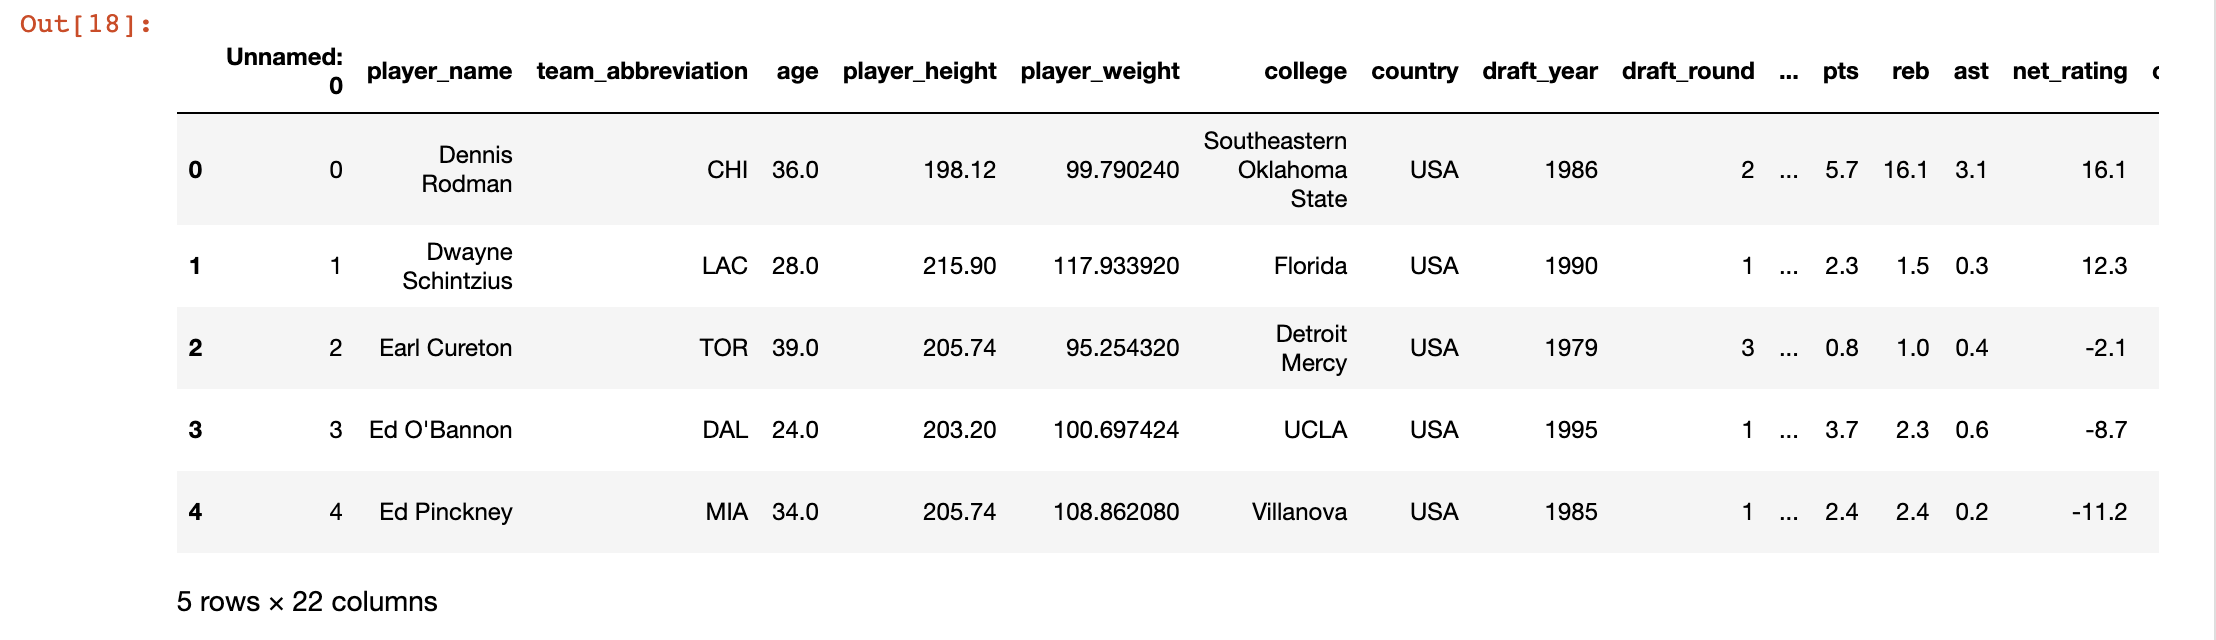


2. 数据尾部示例：

```python
nba_df.tail()
```

运行结果如下：

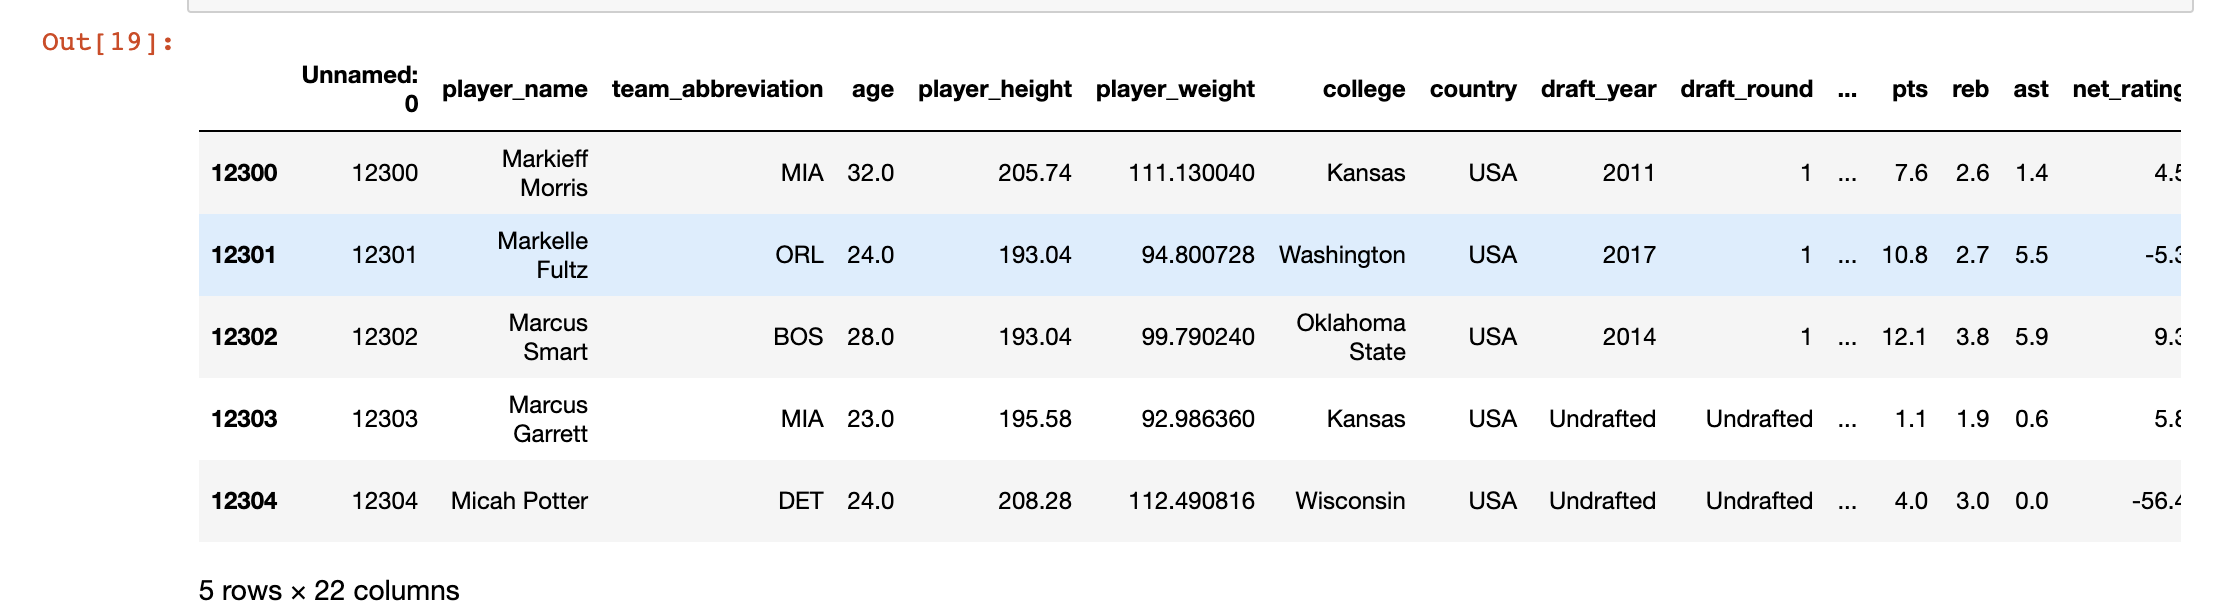

3. 数据采样：


```python
nba_df.sample()
```

运行结果如下:

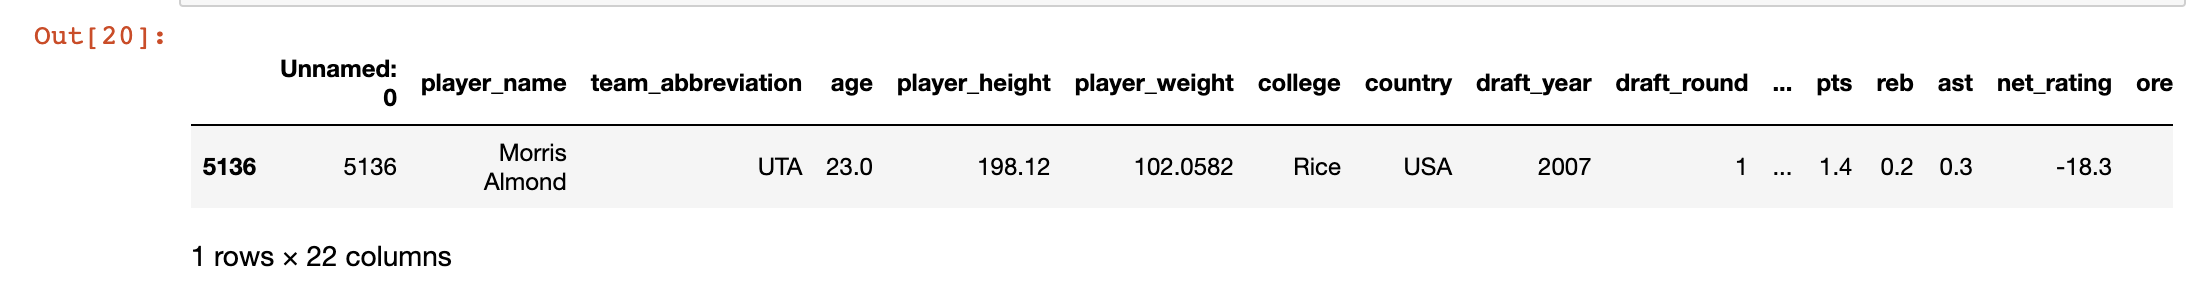

#### 3. 数据清洗

1. **处理缺失值**：使用 `dropna()` 方法删除缺失值，使用 `fillna()` 方法填充缺失值。

`DataFrame.dropna()` 是Pandas中的一个方法，用于在DataFrame中删除包含缺失值（NaN）的行或列。


如果要对nba数据进行缺失值删除操作，则执行以下代码即可：

```python
nba_df = nba_df.dropna()
```

其实我们可以通过 info()的结果发现这个数据集并没有缺失值，所以可以不用执行这一步。但对于一些有缺失值的数据集，我们可以根据需求选择是否进行处理。

我们可以通过一个简单的数据集来看下这个函数的功能：

```python
import pandas as pd

# 创建一个包含缺失值的DataFrame
data = {'A': [1, 2, None, 4],
        'B': [5, None, 7, 8]}
df = pd.DataFrame(data)

# 删除包含缺失值的行
df_cleaned_rows = df.dropna()

# 删除包含缺失值的列
df_cleaned_columns = df.dropna(axis=1)

print("Original DataFrame:")
print(df)
print("\nDataFrame after dropping rows with missing values:")
print(df_cleaned_rows)
print("\nDataFrame after dropping columns with missing values:")
print(df_cleaned_columns)
```

运行结果如下所示：
```txt
Original DataFrame:
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0

DataFrame after dropping rows with missing values:
     A    B
0  1.0  5.0
3  4.0  8.0

DataFrame after dropping columns with missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]
txt


在这个示例中，`df.dropna()` 默认删除行，将包含缺失值的行删除后返回一个新的DataFrame。通过指定 `axis=1` 参数，你可以删除包含缺失值的列。

注意：`dropna()` 方法默认不会修改原始DataFrame，而是返回一个新的DataFrame，如果你想要修改原始数据，可以使用 `inplace=True` 参数。



2. **处理重复值**：使用 `drop_duplicates()` 方法删除重复值。

```python
nba_df = nba_df.drop_duplicates()
```

当然也可以在此之前先判断数据集是否有重复行。

要检查DataFrame是否有重复的行，可以使用`duplicated()`函数。这个函数会返回一个布尔Series，其中每个值表示相应的行是否是重复的。你可以使用`.any()`方法来检查是否存在重复行。

```python
# 检查是否有重复行
has_duplicates = df.duplicated().any()

if has_duplicates:
    print("DataFrame中存在重复行。")
else:
    print("DataFrame中没有重复行。")
```

如果有重复行，你还可以使用`.drop_duplicates()`函数来删除重复行。默认情况下，这个函数会保留第一个出现的行，可以使用`keep`参数来设置保留的方式。例如，`keep='last'`表示保留最后一个出现的行。

```python
import pandas as pd
data = {'name': ['Alice', 'Alice', 'John'],
       'age': [30, 30, 15],
       'gender': ['F', 'F', 'M']}
df = pd.DataFrame(data)
# 原始DataFrame
print("Original DataFrame")
print(df)

# 删除重复行
df_no_duplicates = df.drop_duplicates()

# 输出删除重复行后的DataFrame
print("删除重复行后的DataFrame")
print(df_no_duplicates)
```

运行结果如下：

```txt
Original DataFrame
    name  age gender
0  Alice   30      F
1  Alice   30      F
2   John   15      M
删除重复行后的DataFrame
    name  age gender
0  Alice   30      F
2   John   15      M
```


在实际数据分析中，检查和处理重复行是一个很重要的步骤，以确保数据的准确性和一致性。



- 数据类型转换：使用 `astype()` 方法将列的数据类型转换为合适的类型。
- 示例：清洗数据，处理缺失值和重复值，转换数据类型。



**4. 数据统计分析**


- 使用 `describe()` 方法获取数据的基本统计信息。


获取nba球员年龄统计值

```python
nba_df.describe()['age']
```

运行结果如下：

```txt
count    12305.000000
mean        27.084518
std          4.335868
min         18.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64
```

- 使用 `value_counts()` 方法对某一列进行频率统计。

例如：查看nba球员所在大学的频次

```python
nba_df['college'].value_counts()
```

运行结果如下：

```txt
None                              1789
Kentucky                           420
Duke                               384
North Carolina                     344
UCLA                               307
                                  ... 
George Mason                         1
University of Colorado Boulder       1
Illinois State                       1
Augustana (SD)                       1
UNC                                  1
Name: college, Length: 347, dtype: int64
```

- 计算平均身高、最高身高等统计值。

```python
nba_df['player_height'].describe()
```
或者

```python
nba_df.describe()['player_height']
```

运行结果是：

```txt
count    12305.000000
mean       200.611602
std          9.146321
min        160.020000
25%        193.040000
50%        200.660000
75%        208.280000
max        231.140000
Name: player_height, dtype: float64
```

可以看到这个球员的平均身高是`200.61`，最高身高是`231.14`

上面都是统计整体的一些统计信息。那如何针对具体的部分数据来分析其关联性或者变化等？这时候就需要用到一些分组聚合统计类函数。


回顾下本课的数据分析目标：

1. 分析球员的身高（体重/年龄）等分布
2. 分析球队数量(球员数量)随赛季的变化


相关的函数学习：

1. 聚合与分组操作

- groupby():根据某一列的值对 DataFrame 进行分组，然后可以对分组后的数据进行聚合操作。
```python
grouped = df.groupby('column_name')
grouped['other_column'].mean()  # 对分组后的数据求均值
```

- agg(): 对分组后的数据进行聚合操作
- sum(), mean(), median(), min(), max()：计算分组后的统计量。

2. 排序操作：
- sort_values(): 按指定列的值进行排序
- sort_index(): 按索引排序

3. 直方统计:
- hist(): 绘制直方图

4. 列变换：

- apply():对列应用自定义函数。
- map(): 对列中的元素进行映射操作

5. 列操作：
- rename(): 重命名列名。
- drop(): 删除列
- insert(): 在指定位置插入新列


1. 分析球员的身高分布/体重分布

```python
import pandas as pd
df = pd.read_csv('./all_seasons.csv')
df['player_height'].hist()
```


### 5. 可视化分析


#### 使用 `matplotlib` 


Matplotlib是一个用于绘制数据可视化图表的Python库。它提供了丰富的绘图功能，可以用于创建各种类型的图表，包括线图、散点图、条形图、饼图、直方图等，以及在这些图表上添加标签、标题、轴标签等。

Matplotlib的主要功能包括：
1. **绘制各种类型的图表：** Matplotlib可以绘制多种类型的图表，包括折线图、散点图、条形图、饼图、直方图、箱线图等。
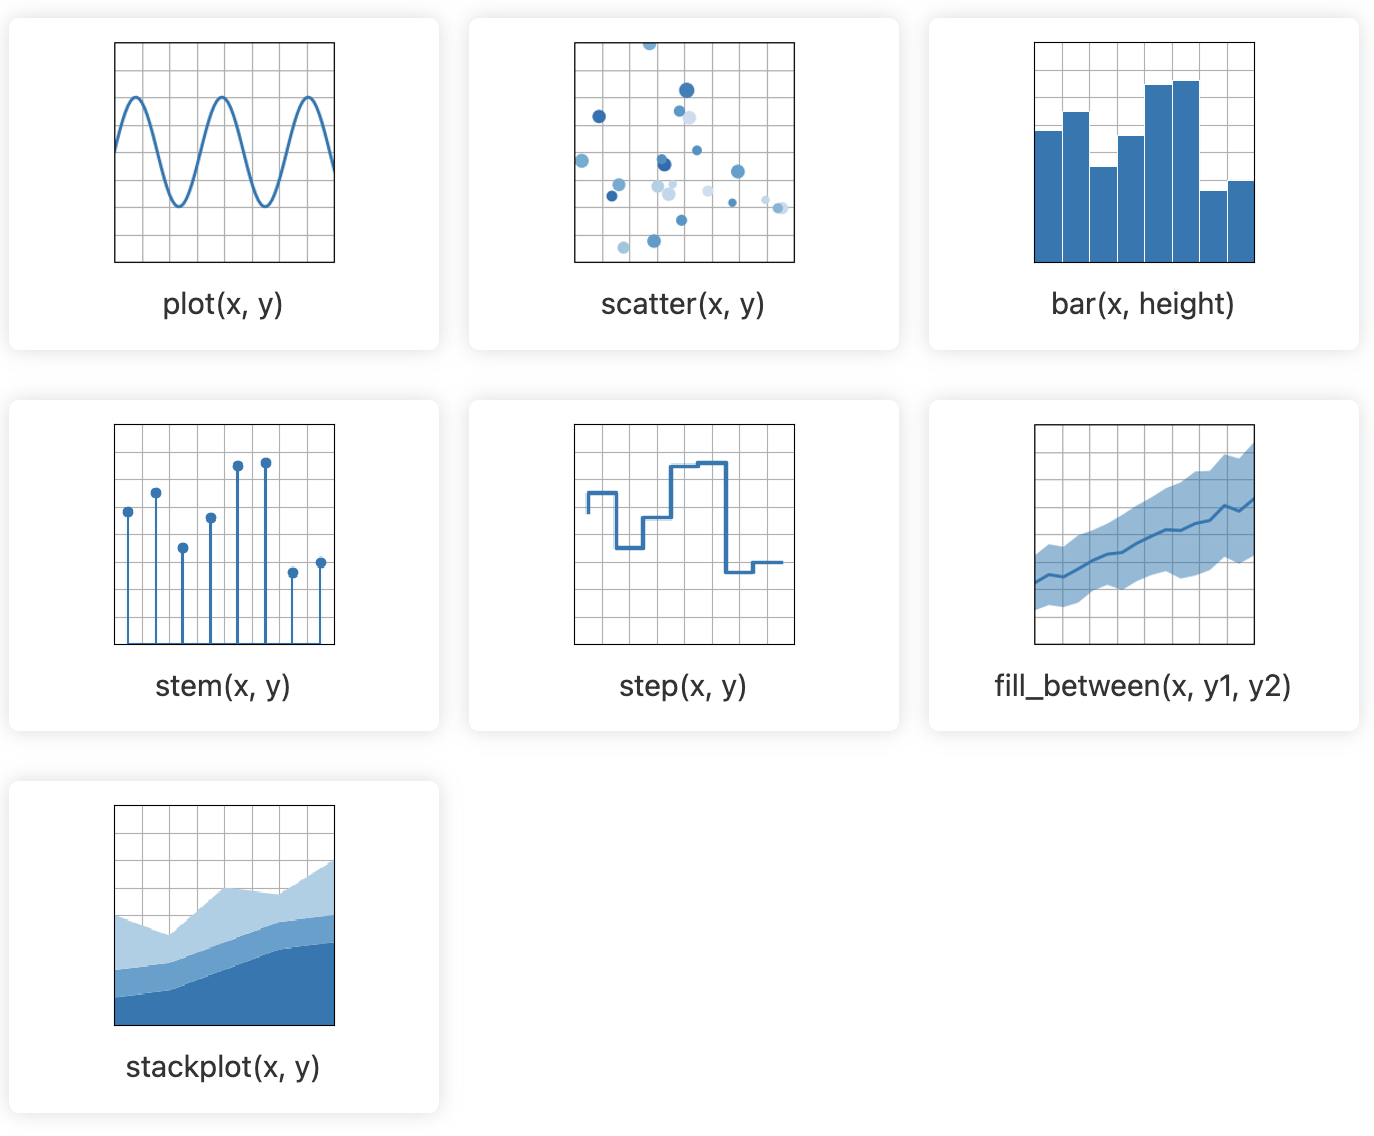


- 基本图表
更多详细类型参考官网文档： https://matplotlib.org/stable/plot_types/index.html

- 画数组（array）与域(field)

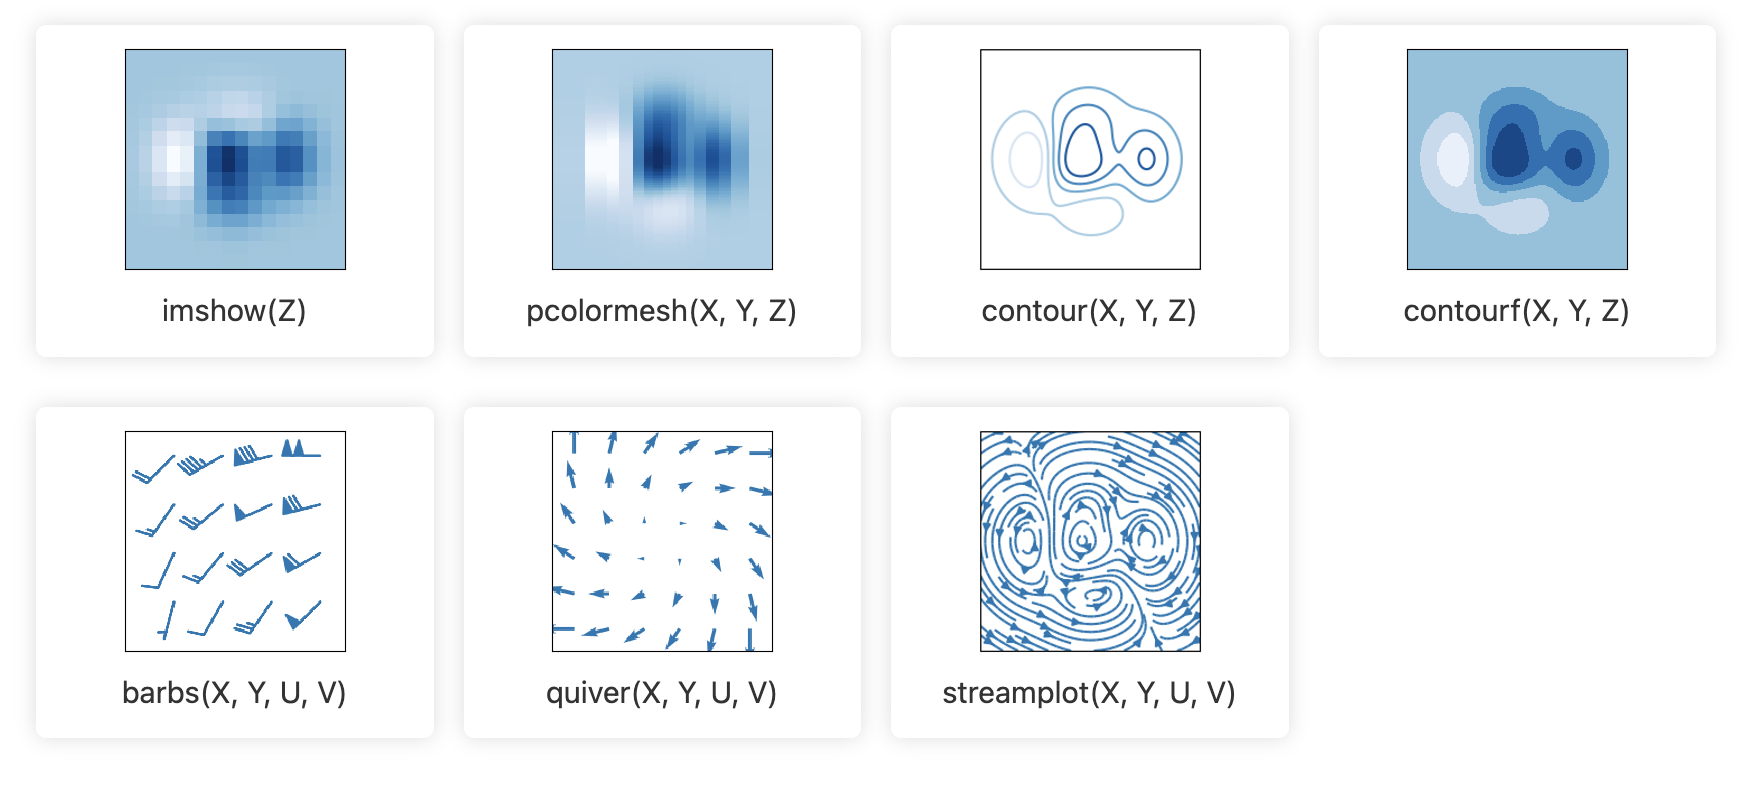

- 统计图

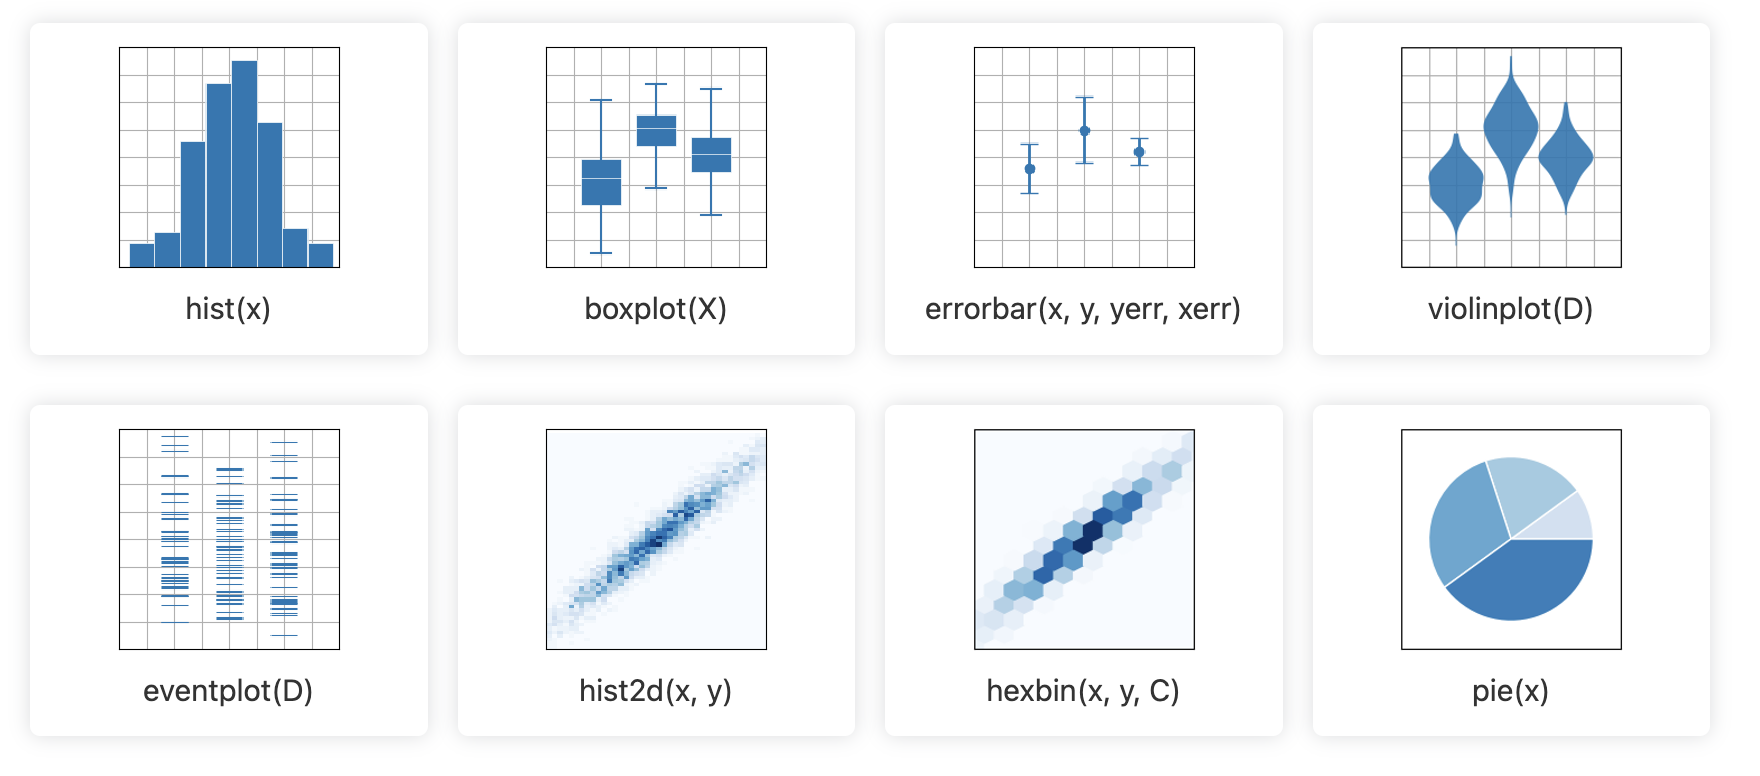

- 非结构化坐标绘制

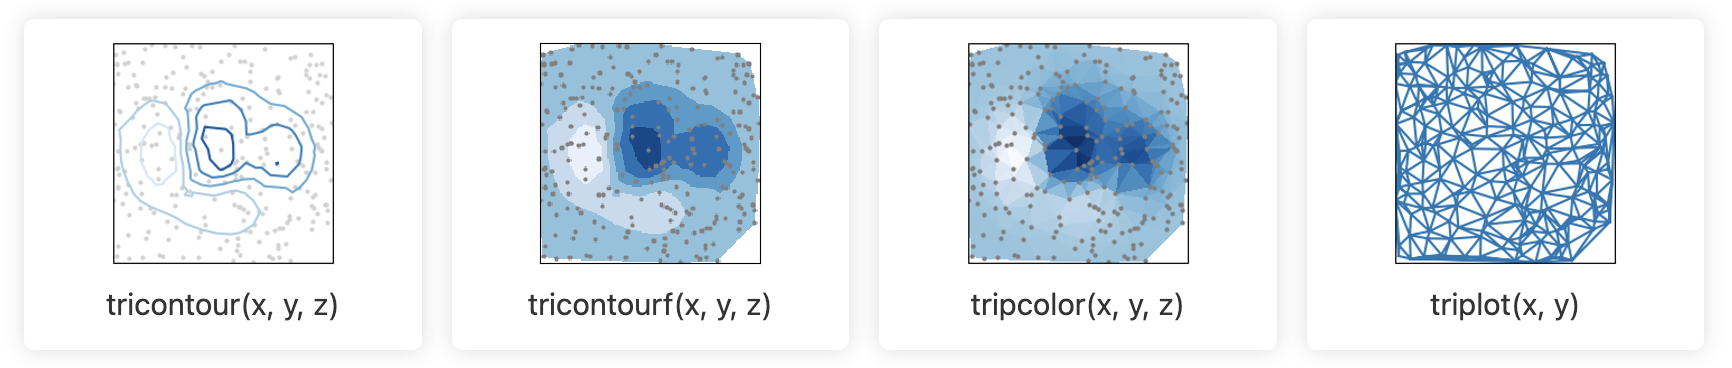

- 3D绘图

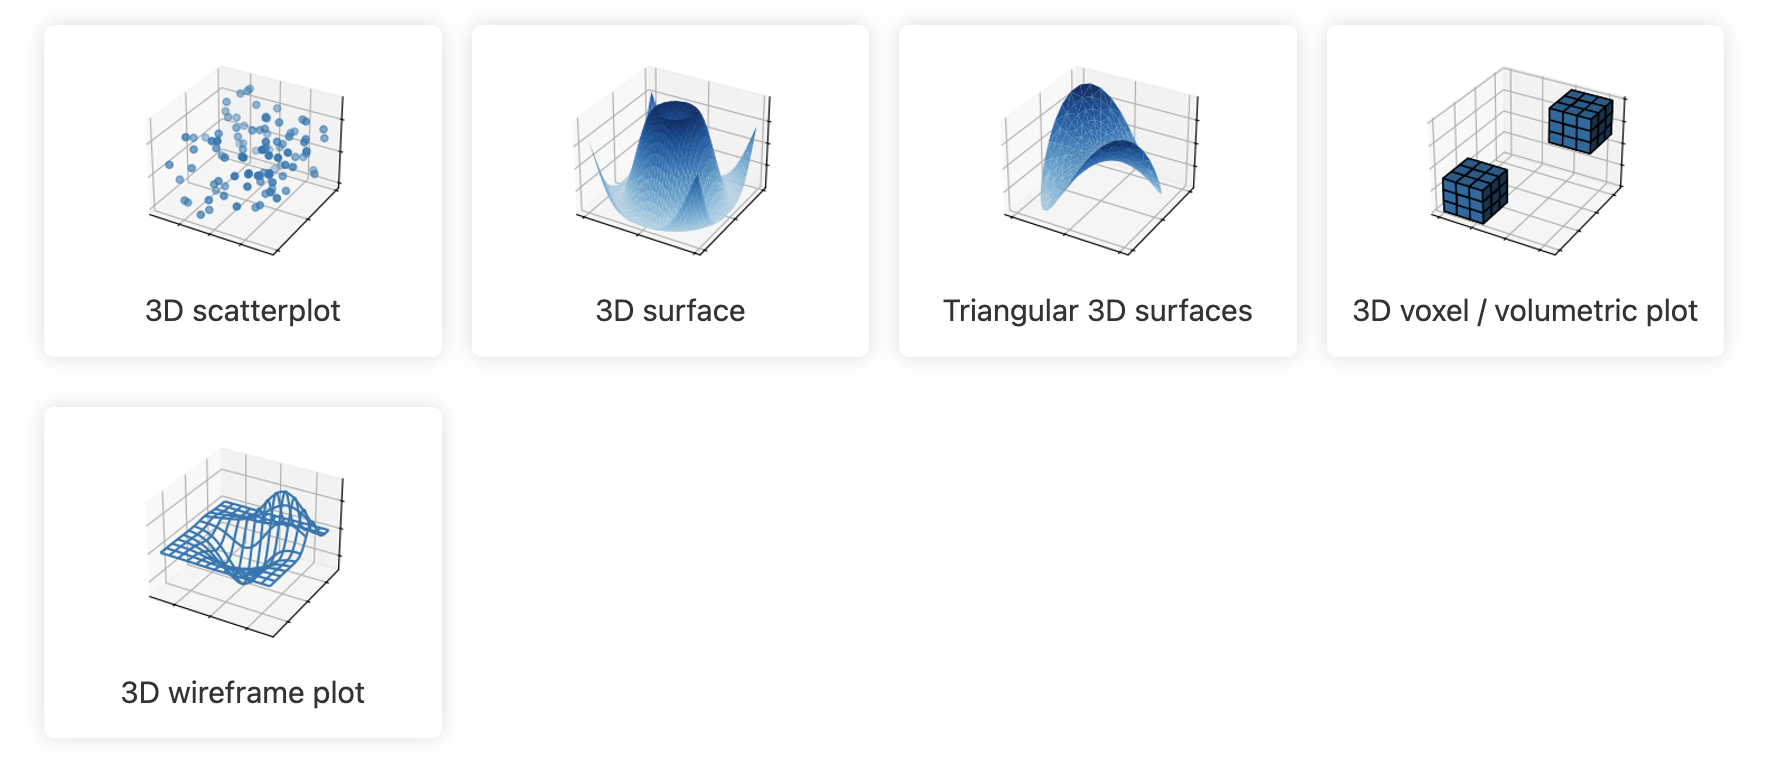


安装：

```
pip install matplotlib
```


绘制一个简单的图形

```python
import matplotlib.pyplot as plt

# 创建数据
x = [1, 2, 3, 4, 5, 6, 7]
y = [55.2, 55.1, 54.5, 56.2, 55.5, 54.3, 53.2]

# 创建折线图
plt.plot(x, y)

# 显示图表
plt.show()
```

这段代码会绘制一个简单的折线图，并通过`plt.show()`显示图表。

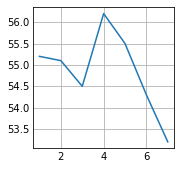

但我们这个图形只显示了数据，无法看出其表示的含义等等。所以我们想增加更多实际信息来使得图形代表的含义更加直观清晰。

- 添加横纵坐标说明，使用`plt.title("标题")`来添加标题，使用`plt.xlabel('xlabel')`设置x轴标签，使用`plt.ylabel('ylabel')`设置y轴标签
```python
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# 创建数据
x = [1, 2, 3, 4, 5, 6, 7]
y = [55.2, 55.1, 54.5, 56.2, 55.5, 54.3, 53.2]

# 创建折线图
plt.plot(x, y)

# 添加标题和轴标签
plt.title('我的一周体重变化表')
plt.xlabel('星期')
plt.ylabel('体重(kg)')

# 显示图表
plt.show()
```

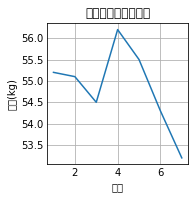

会发现中文无法显示出来。解决办法如下：

在Matplotlib中绘制图表时，如果需要支持中文标签等，需要进行一些设置。以下是在Matplotlib中支持中文的一般步骤：

1. **安装字体库**：首先，确保你的系统中已经安装了支持中文的字体库，比如宋体、黑体等。你可以通过系统自带的字体安装工具或者在线下载安装。

2. **设置中文字体**：在Matplotlib绘图前，设置使用中文字体，可以使用`matplotlib.rcParams`来设置全局字体。

   ```python
   import matplotlib.pyplot as plt
   from matplotlib.font_manager import FontProperties

   # 设置中文字体
   font = FontProperties(fname='/path/to/your/chinese/font.ttf')  # 替换为实际字体文件的路径
   plt.rcParams['font.family'] = font.get_name()
   ```

3. **使用中文标签**：在绘图时，使用中文标签并传入`fontproperties`参数以应用设置的中文字体。

   ```python
    # 创建数据
    x = [1, 2, 3, 4, 5, 6, 7]
    y = [55.2, 55.1, 54.5, 56.2, 55.5, 54.3, 53.2]

    # 创建折线图
    plt.plot(x, y)

    # 添加标题和轴标签
    plt.title('我的一周体重变化表', fontproperties=font)
    plt.xlabel('星期', fontproperties=font)
    plt.ylabel('体重(kg)', fontproperties=font)

    # 显示图表
    plt.show()
   ```

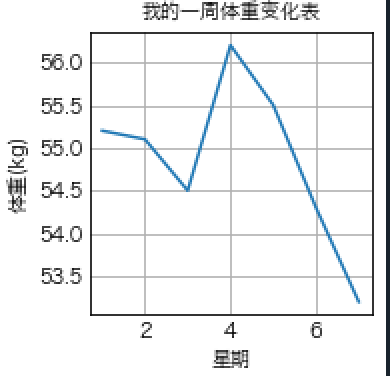


确保你已经将`/path/to/your/chinese/font.ttf`替换为你实际使用的中文字体文件路径。

注意，具体的路径和字体文件名会因操作系统和字体安装方式而异。如果是在Jupyter Notebook中使用，可以在单元格中使用`mpl.rcParams['font.family']`和`mpl.rcParams['font.sans-serif']`来进行设置。

此外，有时候某些字体可能不包含全部中文字符，这可能导致某些字符无法正确显示。如果遇到这种情况，你可能需要更换字体或者选择支持更广泛字符集的字体。



在Windows操作系统下，你可以按照以下步骤设置Matplotlib以支持中文显示：

1. **安装中文字体**：首先，确保你在Windows中安装了支持中文的字体，比如宋体、微软雅黑、黑体等。这些字体通常可以在Windows的字体文件夹（C:\Windows\Fonts）中找到。如果你没有合适的中文字体，你可以从互联网上下载并安装。

2. **配置Matplotlib**：在Python脚本或Jupyter Notebook中，通过以下代码来配置Matplotlib以支持中文显示：

```python
from matplotlib import pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体或其他中文字体的名称
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建数据
x = [1, 2, 3, 4, 5, 6, 7]
y = [55.2, 55.1, 54.5, 56.2, 55.5, 54.3, 53.2]

# 创建折线图
plt.plot(x, y)

# 添加标题和轴标签
plt.title('我的一周体重变化表')
plt.xlabel('星期')
plt.ylabel('体重(kg)')

# 显示图表
plt.show()
```

将`['SimHei']`替换为你实际使用的中文字体的名称。这里使用的是宋体的示例，如果你有其他支持中文的字体，也可以将其名称放入列表中。

3. **Jupyter Notebook注意事项**：如果你在Jupyter Notebook中使用，可以在第一个代码单元中运行这些配置代码，以确保整个Notebook中的图表都支持中文。

通过这些步骤，你应该能够在Windows系统中成功配置Matplotlib以支持中文显示。如果遇到任何问题，可以检查字体名称是否正确或者尝试使用其他支持中文的字体。



#### 绘制柱状图、箱线图、散点图等，以展示数据分布和关系。

不同的图可以表现的数据关系是不同的。

`pyplot` 是 Matplotlib 库的一个子模块，它提供了许多常用的画图函数，用于创建各种类型的图表。以下是一些常用的 `plt` 画图类型：

1. **折线图（Line Plot）：** 使用 `plt.plot()` 函数创建。用于显示数据随时间或其他变量的变化趋势。

2. **散点图（Scatter Plot）：** 使用 `plt.scatter()` 函数创建。用于显示数据点在两个变量之间的分布情况。

3. **柱状图（Bar Plot）：** 使用 `plt.bar()` 函数创建。用于比较多个类别的数据。

4. **直方图（Histogram）：** 使用 `plt.hist()` 函数创建。用于显示数据的分布情况。

5. **饼图（Pie Chart）：** 使用 `plt.pie()` 函数创建。用于显示数据的百分比或比例。

6. **箱线图（Box Plot）：** 使用 `plt.boxplot()` 函数创建。用于显示数据的统计信息，包括中位数、分位数等。

7. **热力图（Heatmap）：** 使用 `plt.imshow()` 函数创建。用于显示矩阵数据的颜色编码，常用于显示相关性或密度。

8. **等高线图（Contour Plot）：** 使用 `plt.contour()` 函数创建。用于显示二维数据的等高线。

9. **3D图（3D Plot）：** 使用 `mpl_toolkits.mplot3d` 中的函数创建。用于显示三维数据的图形，包括3D散点图、曲面图等。

以上只是一些常见的画图类型，Matplotlib 提供了更多类型的函数用于绘制各种图表。你可以根据具体的需求选择合适的函数来创建不同类型的图表。


#### 添加标题、标签、图例等以提高图表可读性。
#### 示例：创建柱状图，展示球员年龄分布。


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


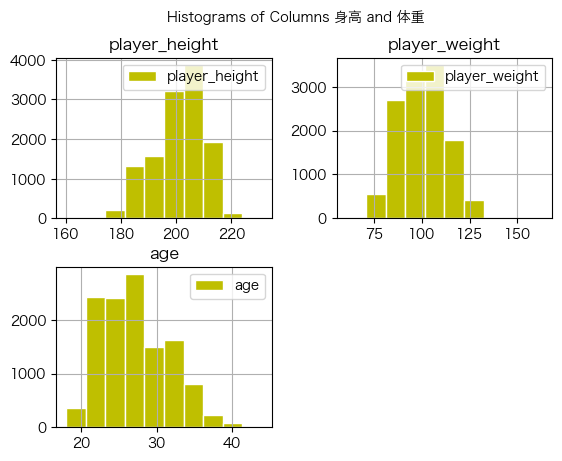

In [22]:
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib.font_manager import FontProperties

# 设置中文字体
font = FontProperties(fname='/System/Library/Fonts/Hiragino Sans GB.ttc')  # 替换为实际字体文件的路径
plt.rcParams['font.family'] = font.get_name()

df = pd.read_csv('./all_seasons.csv')

# 绘制多个直方图，标明图例
ax = df.hist(column=['player_height', 'player_weight', 'age'], bins=10, grid=True, legend=True, color='y', edgecolor='white')

# 设置标题和标签等
plt.suptitle('Histograms of Columns 身高 and 体重', fontproperties=font)
plt.xlabel('value')
plt.ylabel('freq')

# 显示图例
plt.legend()

plt.show()

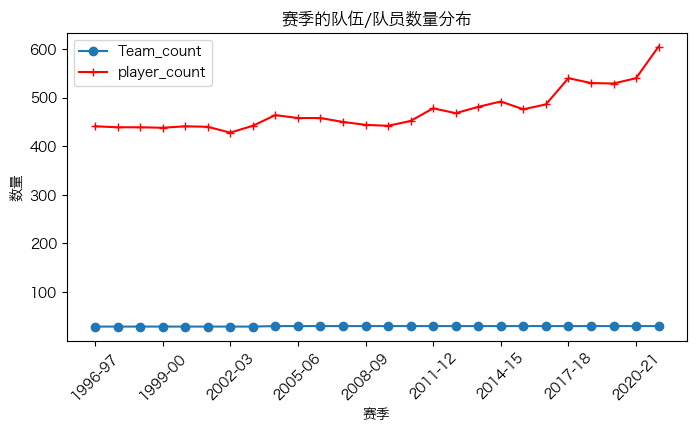

In [19]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from matplotlib.font_manager import FontProperties

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体或其他中文字体的名称
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

df = pd.read_csv('./all_seasons.csv')

select_data = df[['season', 'team_abbreviation']]

result = select_data.groupby('season')


team_count = result['team_abbreviation'].nunique()

team_count = team_count.sort_index()

player_count = result['player_name'].nunique()
player_count = player_count.sort_index()

plt.figure(2, figsize=(8, 4))

plt.plot(team_count.index, team_count.values, marker='o', label='Team_count')

plt.plot(player_count.index, player_count.values, marker='+', color='r', label='player_count')

plt.title('赛季的队伍/队员数量分布')

plt.xlabel('赛季')
plt.xticks(rotation=45, ticks=team_count.index[::3])  # 旋转角度为45度
plt.ylabel('数量')
plt.legend()
plt.show()